In [27]:
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

In [10]:
data = pd.read_csv('datasets/pakistan.csv')
data.head(10)

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,2004-01-15,BALOCHISTAN,Quetta,Quetta,30.187222,67.0125,cereals and tubers,"Rice (basmati, broken)",KG,actual,Retail,PKR,20.0,0.3499
2,2004-01-15,BALOCHISTAN,Quetta,Quetta,30.187222,67.0125,cereals and tubers,Wheat flour,KG,actual,Retail,PKR,13.0,0.2274
3,2004-01-15,KHYBER PAKHTUNKHWA,Peshawar,Peshawar,34.008366,71.580182,cereals and tubers,"Rice (basmati, broken)",KG,actual,Retail,PKR,17.59,0.3076
4,2004-01-15,KHYBER PAKHTUNKHWA,Peshawar,Peshawar,34.008366,71.580182,cereals and tubers,Wheat flour,KG,actual,Retail,PKR,12.0,0.2099
5,2004-01-15,PUNJAB,Lahore,Lahore,31.549722,74.343611,cereals and tubers,"Rice (basmati, broken)",KG,actual,Retail,PKR,19.15,0.335
6,2004-01-15,PUNJAB,Lahore,Lahore,31.549722,74.343611,cereals and tubers,Wheat flour,KG,actual,Retail,PKR,11.75,0.2056
7,2004-01-15,PUNJAB,Multan,Multan,30.195556,71.475278,cereals and tubers,"Rice (basmati, broken)",KG,actual,Retail,PKR,19.0,0.3324
8,2004-01-15,PUNJAB,Multan,Multan,30.195556,71.475278,cereals and tubers,Wheat flour,KG,actual,Retail,PKR,12.0,0.2099
9,2004-01-15,SINDH,Karachi,Karachi,24.9056,67.0822,cereals and tubers,"Rice (basmati, broken)",KG,actual,Retail,PKR,18.62,0.3258


In [11]:
data = data[1:].reset_index(drop=True)  # remove the first description row 
data.head(10)

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,2004-01-15,BALOCHISTAN,Quetta,Quetta,30.187222,67.0125,cereals and tubers,"Rice (basmati, broken)",KG,actual,Retail,PKR,20.0,0.3499
1,2004-01-15,BALOCHISTAN,Quetta,Quetta,30.187222,67.0125,cereals and tubers,Wheat flour,KG,actual,Retail,PKR,13.0,0.2274
2,2004-01-15,KHYBER PAKHTUNKHWA,Peshawar,Peshawar,34.008366,71.580182,cereals and tubers,"Rice (basmati, broken)",KG,actual,Retail,PKR,17.59,0.3076
3,2004-01-15,KHYBER PAKHTUNKHWA,Peshawar,Peshawar,34.008366,71.580182,cereals and tubers,Wheat flour,KG,actual,Retail,PKR,12.0,0.2099
4,2004-01-15,PUNJAB,Lahore,Lahore,31.549722,74.343611,cereals and tubers,"Rice (basmati, broken)",KG,actual,Retail,PKR,19.15,0.335
5,2004-01-15,PUNJAB,Lahore,Lahore,31.549722,74.343611,cereals and tubers,Wheat flour,KG,actual,Retail,PKR,11.75,0.2056
6,2004-01-15,PUNJAB,Multan,Multan,30.195556,71.475278,cereals and tubers,"Rice (basmati, broken)",KG,actual,Retail,PKR,19.0,0.3324
7,2004-01-15,PUNJAB,Multan,Multan,30.195556,71.475278,cereals and tubers,Wheat flour,KG,actual,Retail,PKR,12.0,0.2099
8,2004-01-15,SINDH,Karachi,Karachi,24.9056,67.0822,cereals and tubers,"Rice (basmati, broken)",KG,actual,Retail,PKR,18.62,0.3258
9,2004-01-15,SINDH,Karachi,Karachi,24.9056,67.0822,cereals and tubers,Wheat flour,KG,actual,Retail,PKR,14.01,0.245


In [26]:
print(sorted(data.columns))

['admin1', 'admin2', 'category', 'commodity', 'currency', 'date', 'latitude', 'longitude', 'market', 'price', 'priceflag', 'pricetype', 'unit', 'usdprice']


In [13]:
print(sorted(data.commodity.unique()))

['Beans(mash)', 'Eggs', 'Fuel (diesel)', 'Fuel (petrol-gasoline)', 'Ghee (artificial)', 'Lentils (masur)', 'Lentils (moong)', 'Milk', 'Oil (cooking)', 'Poultry', 'Rice (basmati, broken)', 'Rice (coarse)', 'Salt', 'Sugar', 'Wage (non-qualified labour, non-agricultural)', 'Wheat', 'Wheat flour']


In [29]:
data.date = pd.to_datetime(data.date)

In [34]:
data.price = data.price.astype(float)

In [14]:
# simplify commodity names
data.commodity = data.commodity.str.lower()
data.commodity[data.commodity == 'ghee (artificial)'] = 'ghee'
data.commodity[data.commodity == 'beans(mash)'] = 'beans'
data.commodity[data.commodity == 'fuel (diesel)'] = 'diesel'
data.commodity[data.commodity == 'fuel (petrol-gasoline)'] = 'petrol'
data.commodity[data.commodity == 'lentils (masur)'] = 'masur'
data.commodity[data.commodity == 'lentils (moong)'] = 'moong'
data.commodity[data.commodity == 'oil (cooking)'] = 'oil'
data.commodity[data.commodity == 'rice (basmati, broken)'] = 'basmati rice'
data.commodity[data.commodity == 'rice (coarse)'] = 'coarse rice'
data.commodity[data.commodity == 'wage (non-qualified labour, non-agricultural)'] = 'wage'

In [15]:
print(sorted(data.commodity.unique()))

['basmati rice', 'beans', 'coarse rice', 'diesel', 'eggs', 'ghee', 'masur', 'milk', 'moong', 'oil', 'petrol', 'poultry', 'salt', 'sugar', 'wage', 'wheat', 'wheat flour']


In [37]:
import dateparser

natural_dates = [
    "last year",
    "23 of september, 2022"
]

absolute_dates = [dateparser.parse(date, settings={'REQUIRE_PARTS': ['year']}) for date in natural_dates]

for nat_date, abs_date in zip(natural_dates, absolute_dates):
    if abs_date:
        print(f"{nat_date} -> {abs_date.strftime('%Y-%m-%d')}")
    else:
        print(f"{nat_date} -> Unable to parse the date")

last year -> 2023-05-20
23 of september, 2022 -> 2022-09-23


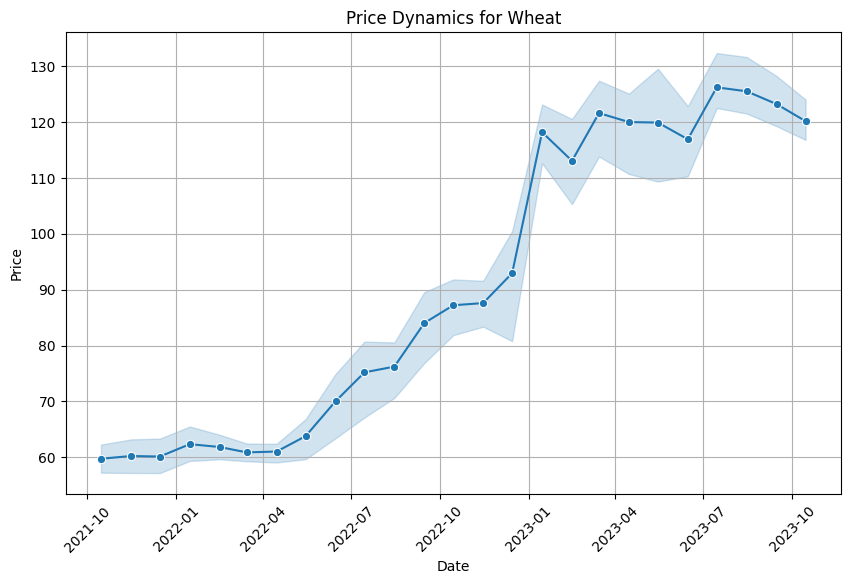

In [35]:
# example how to query dataset with dates in natural language
# query: price of wheat from september 2021 to october 2023

# extracted entities (done by RASA)
commodity = 'wheat'
dates = ['september 2021', 'october 2023']

dates_absolute = sorted(map(dateparser.parse, dates))

start_date, end_date = dates_absolute
filtered_df = data[(data['commodity'] == commodity) &
                   (data['date'] >= start_date) &
                   (data['date'] <= end_date)]

# Plotting the price dynamic using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_df, x='date', y='price', marker='o')

# Customizing the plot
plt.title(f'Price Dynamics for {commodity.capitalize()}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)

# Show plot
plt.show()

In [39]:
data.to_csv('datasets/pakistan.csv', index=False)